In [585]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
df = pd.read_csv('Student Profiles Wrangled.csv')

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   STUDENT ID                             244 non-null    object 
 1   SALUTATION                             244 non-null    object 
 2   GENDER                                 244 non-null    object 
 3   NATIONALITY                            244 non-null    object 
 4   DOB                                    244 non-null    object 
 5   HIGHEST QUALIFICATION                  244 non-null    object 
 6   NAME OF QUALIFICATION AND INSTITUTION  244 non-null    object 
 7   DATE ATTAINED HIGHEST QUALIFICATION    244 non-null    object 
 8   DESIGNATION                            244 non-null    object 
 9   INTAKE NO                              244 non-null    object 
 10  COMMENCEMENT DATE                      244 non-null    object 
 11  COMPLE

# UNIVARIATE

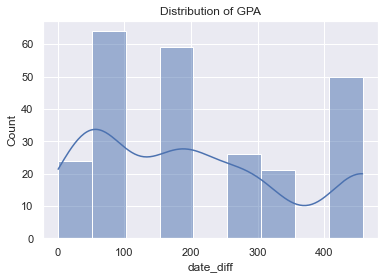

In [587]:
sns.histplot(data=df, x='date_diff', kde=True)
plt.title('Distribution of GPA')
plt.show()

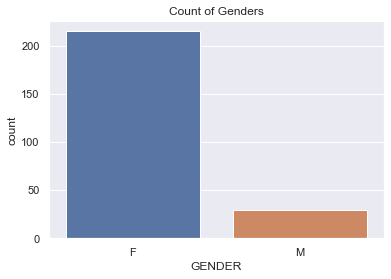

In [588]:
sns.countplot(data=df, x='GENDER')
plt.title('Count of Genders')
plt.show()

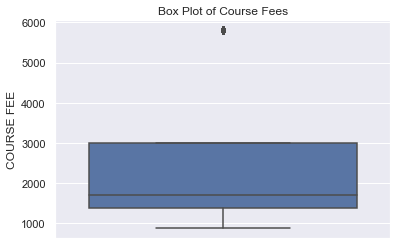

In [589]:
sns.boxplot(data=df, y='COURSE FEE')
plt.title('Box Plot of Course Fees')
plt.show()

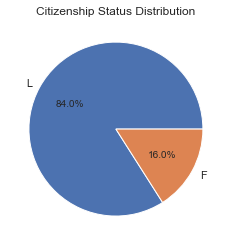

In [590]:
df['CITIZENSHIP_STATUS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Citizenship Status Distribution')
plt.ylabel('')
plt.show()

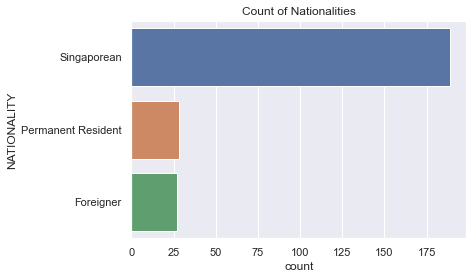

In [591]:
sns.countplot(data=df, y='NATIONALITY')
plt.title('Count of Nationalities')
plt.show()

# BIVARIATE

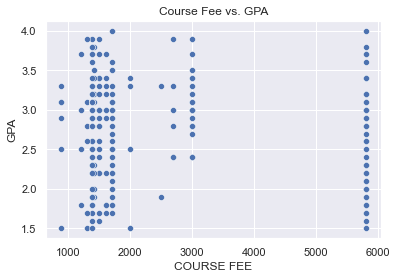

In [592]:
sns.scatterplot(data=df, x='COURSE FEE', y='GPA')
plt.title('Course Fee vs. GPA')
plt.show()

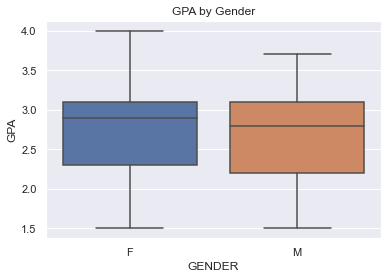

In [593]:
sns.boxplot(data=df, x='GENDER', y='GPA')
plt.title('GPA by Gender')
plt.show()

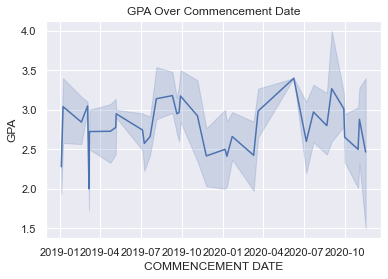

In [594]:
df['COMMENCEMENT DATE'] = pd.to_datetime(df['COMMENCEMENT DATE'], errors='coerce')
sns.lineplot(data=df, x='COMMENCEMENT DATE', y='GPA')
plt.title('GPA Over Commencement Date')
plt.show()

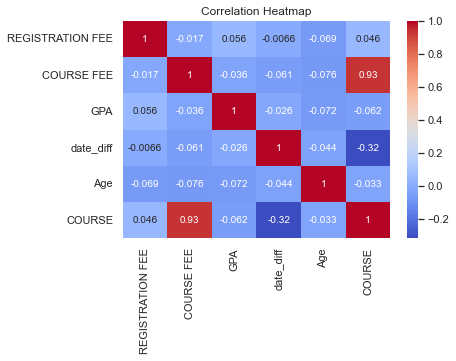

In [595]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

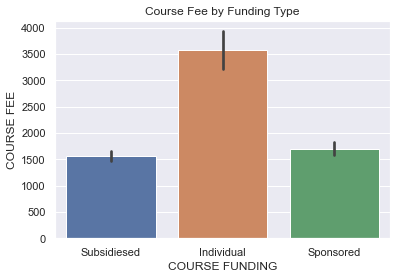

In [596]:
sns.barplot(data=df, x='COURSE FUNDING', y='COURSE FEE')
plt.title('Course Fee by Funding Type')
plt.show()


# TRIVARIATE

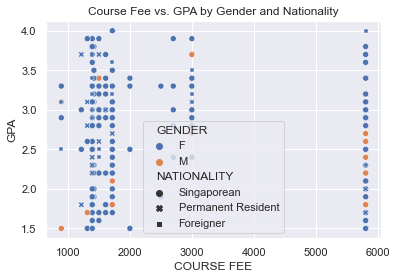

In [597]:
sns.scatterplot(data=df, x='COURSE FEE', y='GPA', hue='GENDER', style='NATIONALITY')
plt.title('Course Fee vs. GPA by Gender and Nationality')
plt.show()


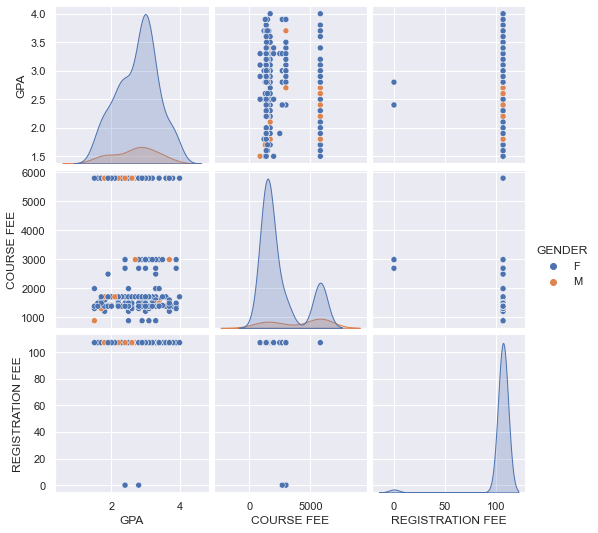

In [598]:
sns.pairplot(df, vars=['GPA', 'COURSE FEE', 'REGISTRATION FEE'], hue='GENDER')
plt.show()

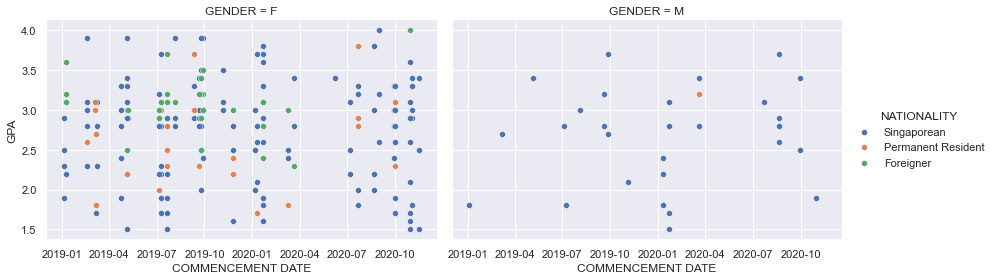

In [599]:
g = sns.FacetGrid(df, col='GENDER', hue='NATIONALITY', height=4, aspect=1.5)
g.map(sns.scatterplot, 'COMMENCEMENT DATE', 'GPA').add_legend()
plt.show()


In [600]:
df['NATIONALITY'].unique()

array(['Singaporean', 'Permanent Resident', 'Foreigner'], dtype=object)

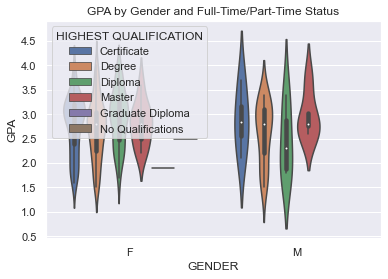

In [601]:
sns.violinplot(data=df, x='GENDER', y='GPA',hue='HIGHEST QUALIFICATION')
plt.title('GPA by Gender and Full-Time/Part-Time Status')
plt.show()

# Tests

In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   STUDENT ID                             244 non-null    object        
 1   SALUTATION                             244 non-null    object        
 2   GENDER                                 244 non-null    object        
 3   NATIONALITY                            244 non-null    object        
 4   DOB                                    244 non-null    object        
 5   HIGHEST QUALIFICATION                  244 non-null    object        
 6   NAME OF QUALIFICATION AND INSTITUTION  244 non-null    object        
 7   DATE ATTAINED HIGHEST QUALIFICATION    244 non-null    object        
 8   DESIGNATION                            244 non-null    object        
 9   INTAKE NO                              244 non-null    object    

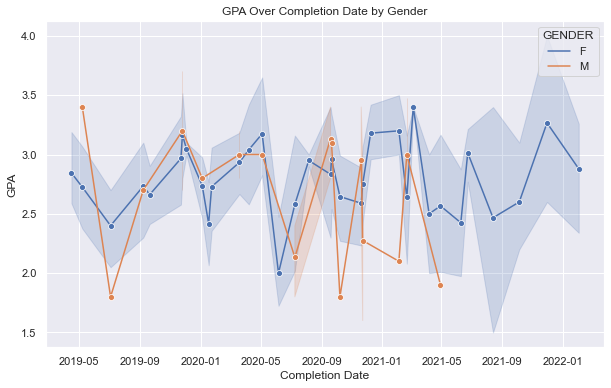

In [603]:
# Convert the COMPLETION DATE column to datetime if it is not already
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='COMPLETION DATE', y='GPA', hue='GENDER', marker='o')

# Adding labels and title
plt.title('GPA Over Completion Date by Gender')
plt.xlabel('Completion Date')
plt.ylabel('GPA')

# Show the plot
plt.show()

In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   STUDENT ID                             244 non-null    object        
 1   SALUTATION                             244 non-null    object        
 2   GENDER                                 244 non-null    object        
 3   NATIONALITY                            244 non-null    object        
 4   DOB                                    244 non-null    object        
 5   HIGHEST QUALIFICATION                  244 non-null    object        
 6   NAME OF QUALIFICATION AND INSTITUTION  244 non-null    object        
 7   DATE ATTAINED HIGHEST QUALIFICATION    244 non-null    object        
 8   DESIGNATION                            244 non-null    object        
 9   INTAKE NO                              244 non-null    object    

In [605]:
df['date_diff'].unique()

array([456, 455, 457, 270, 268, 274, 273,  58,  61,  51, 306,  56,   1,
        60,  53, 181, 183, 180], dtype=int64)

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   STUDENT ID                             244 non-null    object        
 1   SALUTATION                             244 non-null    object        
 2   GENDER                                 244 non-null    object        
 3   NATIONALITY                            244 non-null    object        
 4   DOB                                    244 non-null    object        
 5   HIGHEST QUALIFICATION                  244 non-null    object        
 6   NAME OF QUALIFICATION AND INSTITUTION  244 non-null    object        
 7   DATE ATTAINED HIGHEST QUALIFICATION    244 non-null    object        
 8   DESIGNATION                            244 non-null    object        
 9   INTAKE NO                              244 non-null    object    

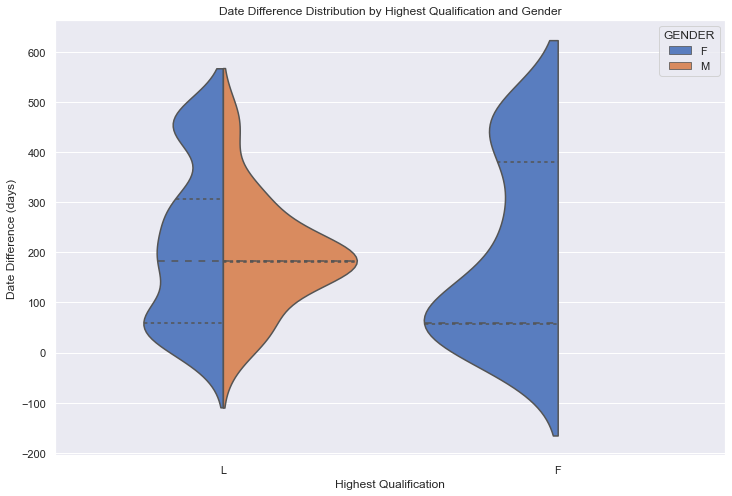

In [607]:
# Ensure 'GENDER' is a categorical variable
df['GENDER'] = df['GENDER'].astype('category')

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='CITIZENSHIP_STATUS', y='date_diff', hue='GENDER', data=df, split=True, inner='quart', palette='muted')

# Add title and labels
plt.title('Date Difference Distribution by Highest Qualification and Gender')
plt.xlabel('Highest Qualification')
plt.ylabel('Date Difference (days)')

# Show the plot
plt.xticks()
plt.show()

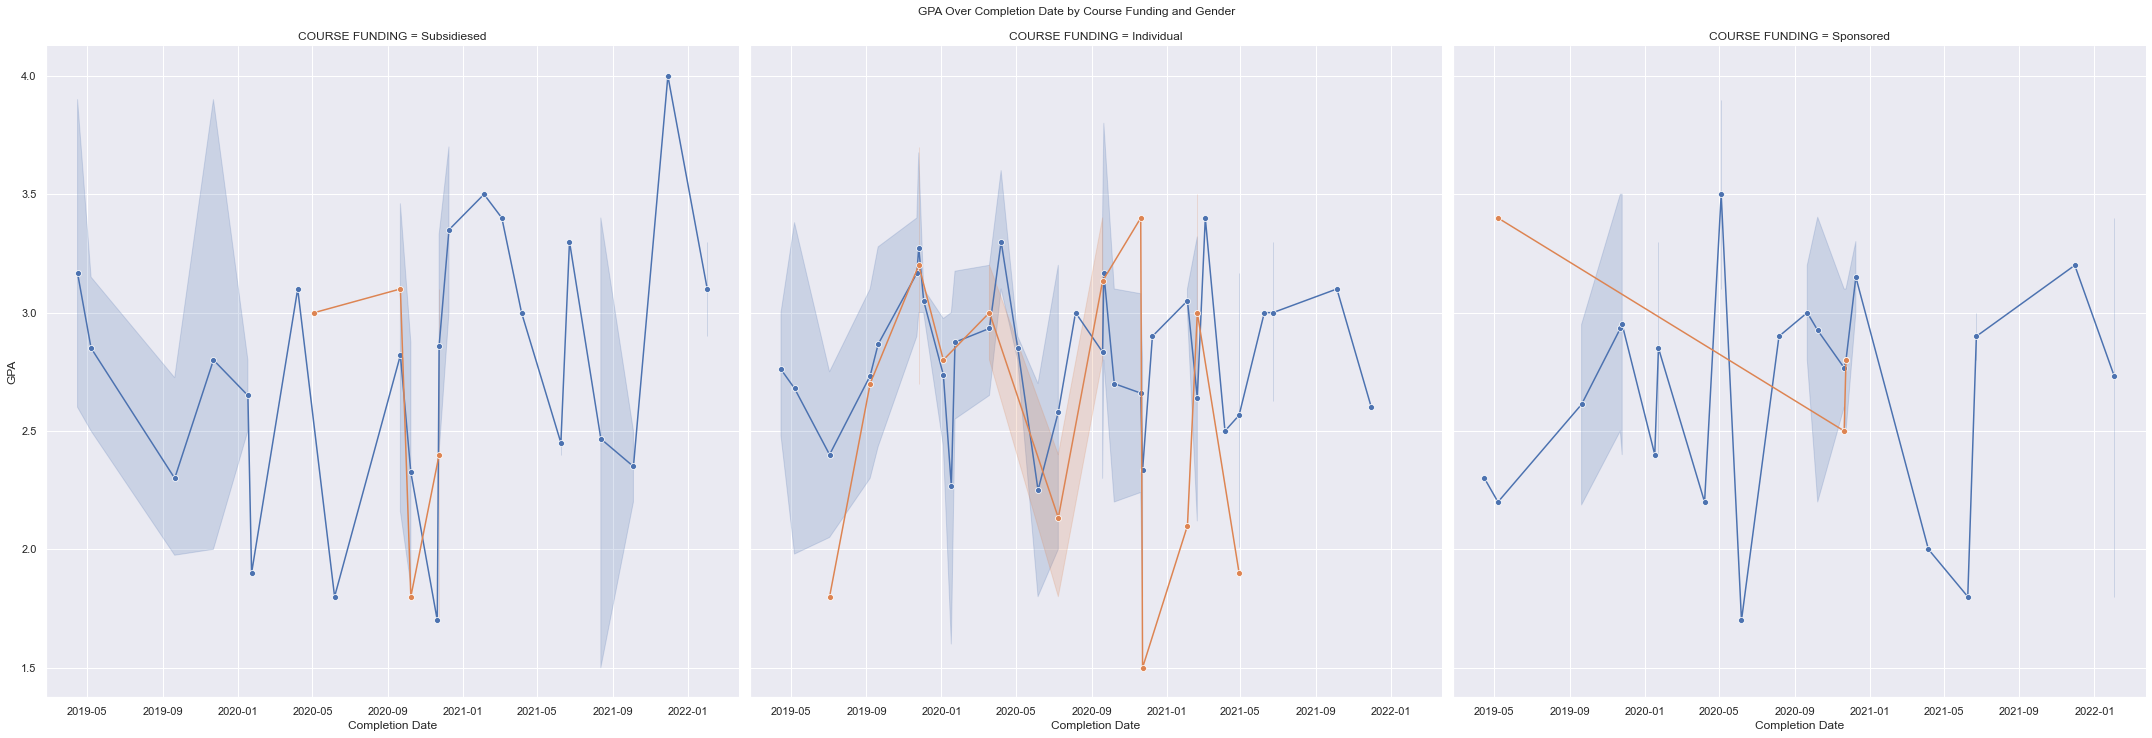

In [608]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom plotting function
def lineplot_with_hue(data, **kwargs):
    sns.lineplot(data=data, x='COMPLETION DATE', y='GPA', hue='GENDER', marker='o')

# Create a FacetGrid to plot GPA over Completion Date for each NATIONALITY
g = sns.FacetGrid(df, col='COURSE FUNDING', height=10, aspect=1)
g.map_dataframe(lineplot_with_hue)

# Adding labels and title
g.set_axis_labels('Completion Date', 'GPA')
g.fig.suptitle('GPA Over Completion Date by Course Funding and Gender', y=1.02)  # Adjust y for title spacing

# Show the plot
plt.show()

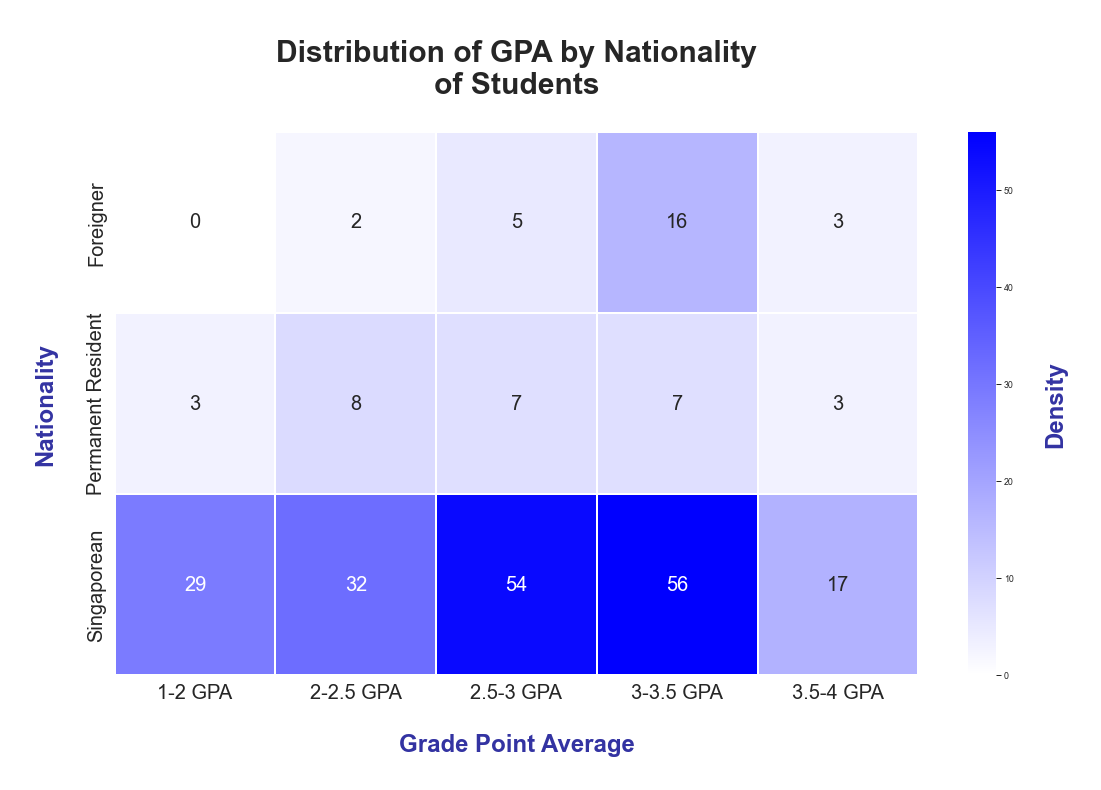

In [609]:
cmap = mcolors.LinearSegmentedColormap.from_list("white_to_blue", ["white", "blue"])

# Categorize GPA into 5 categories
gpa_bins = [1.0, 2.0, 2.5, 3.0, 3.5, 4.0]
gpa_labels = ['1-2 GPA', '2-2.5 GPA', '2.5-3 GPA', '3-3.5 GPA', '3.5-4 GPA']
df['GPA_Category'] = pd.cut(df['GPA'], bins=gpa_bins, labels=gpa_labels, right=False)

# Create a pivot table to count occurrences
pivot_table = df.pivot_table(index='NATIONALITY', columns='GPA_Category', aggfunc='size', fill_value=0)

sns.set_theme(context='paper', style='darkgrid', palette='ch:s=.45,rot=-.25', font='sans-serif')

plt.figure(figsize=(18, 10))

# Create the heatmap with annotations
heatmap = sns.heatmap(pivot_table, annot=True, fmt="d", cbar=True, linewidths=0.3, cmap=cmap, annot_kws={"size": 20})

# Manually set the GPA xticks
xtick_labels = pivot_table.columns
heatmap.set_xticklabels(xtick_labels)

# Adding a color bar
cbar = heatmap.collections[0].colorbar
cbar.set_label('\nDensity\n', fontsize=24, color='#00008b',weight='bold', alpha=0.8)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('\nGrade Point Average\n', fontsize=24, color='#00008b', weight='bold',alpha=0.8)
plt.ylabel('\nNationality\n', fontsize=24, color='#00008b', weight='bold', alpha=0.8)
plt.title('\nDistribution of GPA by Nationality\nof Students\n', fontsize=30, weight='bold')
plt.show()

In [610]:
df['COURSE FUNDING'].unique()

array(['Subsidiesed', 'Individual', 'Sponsored'], dtype=object)

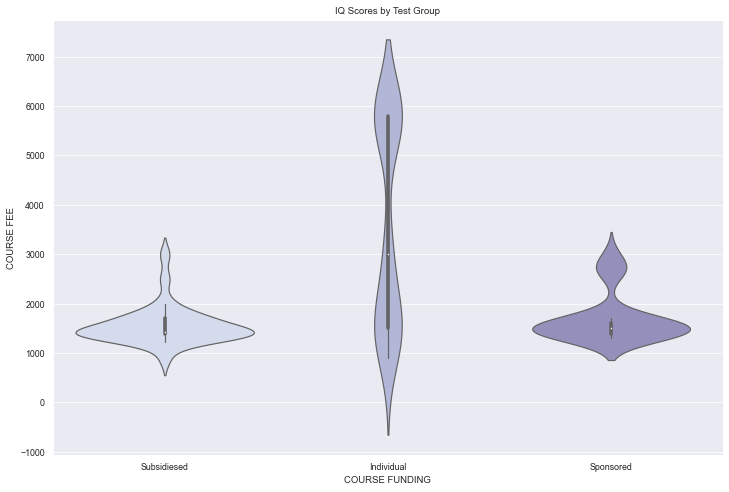

In [611]:
plt.figure(figsize=(12, 8))  # Adjust the width and height as per your preference
violin_plot = sns.violinplot(x='COURSE FUNDING', y='COURSE FEE', data=df)
violin_plot.set_title('IQ Scores by Test Group')
sns.despine(top=False, right=False, left=False)

# Show the plot
plt.show()

In [612]:
df['COURSE FEE'].unique()

array([1712, 1212, 1604, 2996, 2696, 1496, 1996, 2496, 1388, 1415, 1495,
        888, 1308, 5803], dtype=int64)

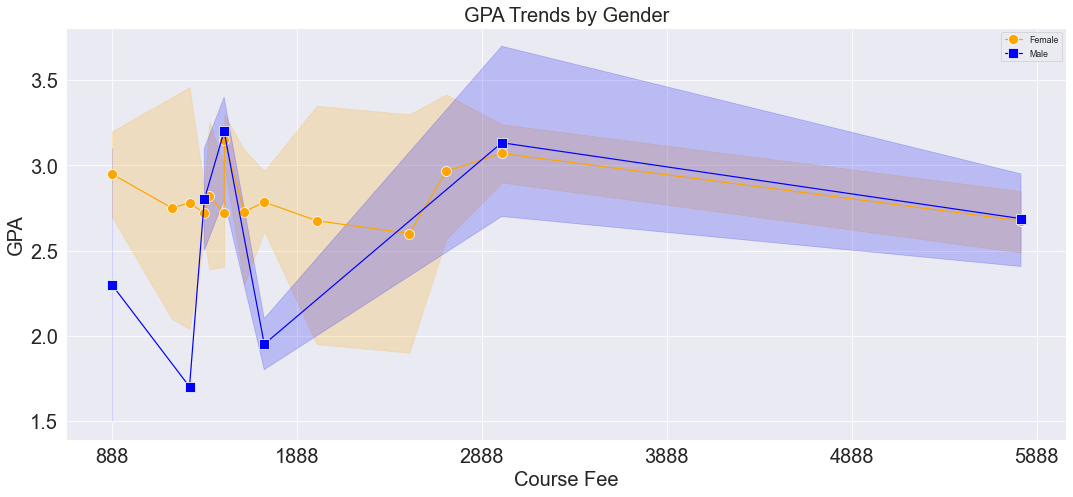

In [613]:
# Ensure 'COMPLETION DATE' is in datetime format
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Separate the data by gender
df_female = df[df['GENDER'] == 'F']
df_male = df[df['GENDER'] == 'M']

# Determine the range for the course fees
min_fee = df['COURSE FEE'].min()
max_fee = df['COURSE FEE'].max()

# Create a range of values from min to max course fee with a 1000 interval
fee_range = np.arange(min_fee, max_fee + 1000, 1000)

# Plot the data
plt.figure(figsize=(15, 7))

# Line plot for females with pink color and circle marker
sns.lineplot(data=df_female, x='COURSE FEE', y='GPA', label='Female', color='orange', marker='o', markersize=10)

# Line plot for males with blue color and square marker
sns.lineplot(data=df_male, x='COURSE FEE', y='GPA', label='Male', color='blue', marker='s', markersize=10)

# Customize the plot
plt.xlabel('Course Fee', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.title('GPA Trends by Gender', fontsize=20)

# Set x-axis intervals to match the fee range
plt.xticks(ticks=fee_range, fontsize=20)
plt.yticks(fontsize=20)

plt.grid(True)  # Add grid lines
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


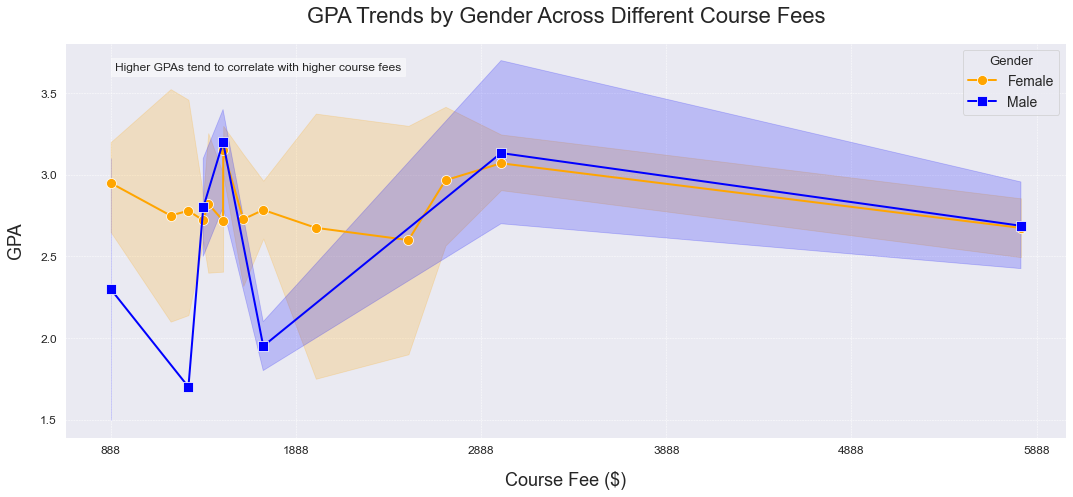

In [614]:
# Ensure 'COMPLETION DATE' is in datetime format
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Separate the data by gender
df_female = df[df['GENDER'] == 'F']
df_male = df[df['GENDER'] == 'M']

# Determine the range for the course fees
min_fee = df['COURSE FEE'].min()
max_fee = df['COURSE FEE'].max()

# Create a range of values from min to max course fee with a 1000 interval
fee_range = np.arange(min_fee, max_fee + 1000, 1000)

# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Plot the data
plt.figure(figsize=(15, 7))

# Line plot for females with magenta color and circle marker
sns.lineplot(data=df_female, x='COURSE FEE', y='GPA', label='Female', color='orange', marker='o', markersize=10, linewidth=2)

# Line plot for males with blue color and square marker
sns.lineplot(data=df_male, x='COURSE FEE', y='GPA', label='Male', color='blue', marker='s', markersize=10, linewidth=2)

# Customize the plot
plt.xlabel('Course Fee ($)', fontsize=18, labelpad=15)
plt.ylabel('GPA', fontsize=18, labelpad=15)
plt.title('GPA Trends by Gender Across Different Course Fees', fontsize=22, pad=20)

# Set x-axis intervals to match the fee range
plt.xticks(ticks=fee_range, fontsize=12)
plt.yticks(fontsize=12)

# Enhancements
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc='upper right', fontsize=14, title='Gender', title_fontsize='13')

# Annotations for better clarity
plt.text(0.05, 0.95, 'Higher GPAs tend to correlate with higher course fees',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.tight_layout()
plt.show()


In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   STUDENT ID                             244 non-null    object        
 1   SALUTATION                             244 non-null    object        
 2   GENDER                                 244 non-null    category      
 3   NATIONALITY                            244 non-null    object        
 4   DOB                                    244 non-null    object        
 5   HIGHEST QUALIFICATION                  244 non-null    object        
 6   NAME OF QUALIFICATION AND INSTITUTION  244 non-null    object        
 7   DATE ATTAINED HIGHEST QUALIFICATION    244 non-null    object        
 8   DESIGNATION                            244 non-null    object        
 9   INTAKE NO                              244 non-null    object    

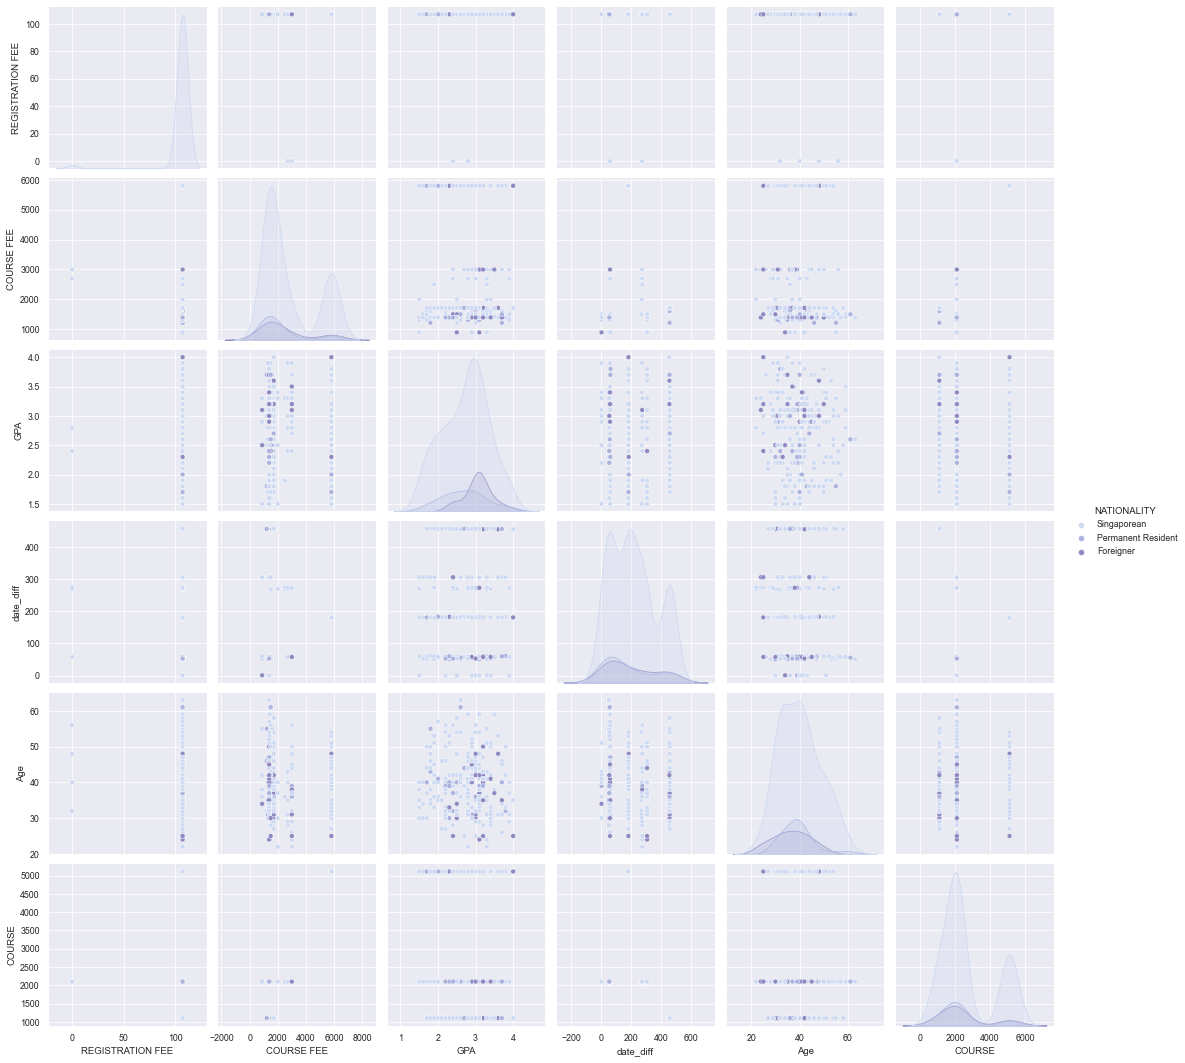

In [616]:
g = sns.pairplot(df, hue="NATIONALITY")

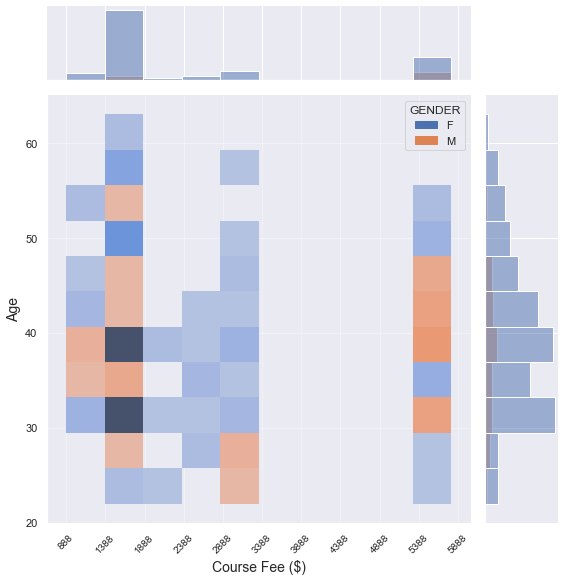

In [617]:
# Set the aesthetic style of the plots
sns.set(style="darkgrid")

# Create the jointplot
joint = sns.jointplot(x="COURSE FEE", y="Age", data=df, cmap="coolwarm", height=8,hue='GENDER',kind='hist')

# Customize the plot
joint.set_axis_labels('Course Fee ($)', 'Age', fontsize=14)
joint.ax_joint.set_title('Joint Distribution of Course Fee and Age', fontsize=18, pad=20)
joint.ax_joint.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set x-axis intervals to 500
min_fee = df['COURSE FEE'].min()
max_fee = df['COURSE FEE'].max()
fee_range = np.arange(min_fee, max_fee + 500, 500)
joint.ax_joint.set_xticks(fee_range)
joint.ax_joint.set_xticklabels(fee_range, fontsize=10, rotation=45)

# Show the plot
plt.show()


f:\anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


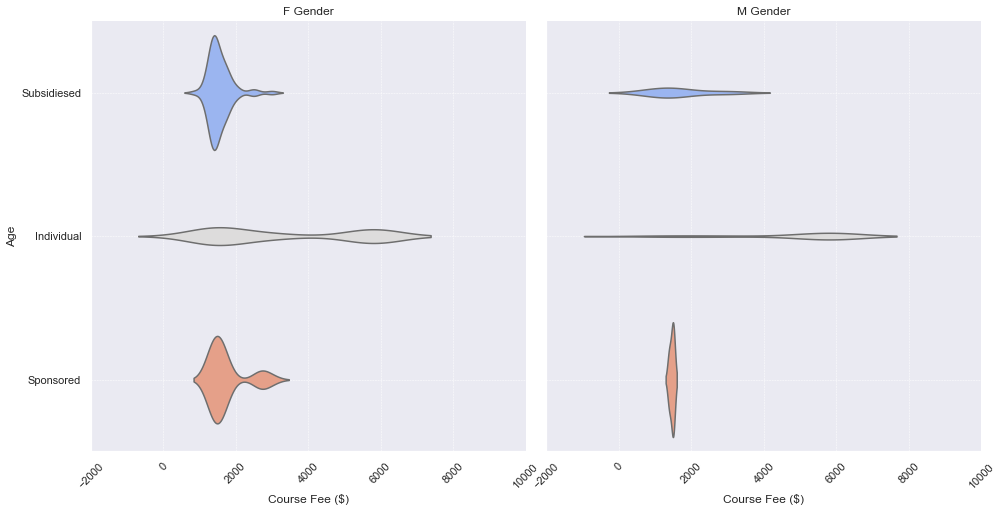

In [618]:
# Set the aesthetic style of the plots
sns.set(style="darkgrid")

# Create the FacetGrid
g = sns.FacetGrid(df, col="GENDER", height=7, aspect=1)
g.map(sns.violinplot, 'COURSE FEE', 'COURSE FUNDING', inner=None, palette="coolwarm")

# Customize the plot
g.set_axis_labels('Course Fee ($)', 'Age')
g.set_titles(col_template="{col_name} Gender")
g.set_xticklabels(rotation=45)

# Set x-axis intervals to 500
min_fee = df['COURSE FEE'].min()
max_fee = df['COURSE FEE'].max()
fee_range = np.arange(min_fee, max_fee + 500, 500)
for ax in g.axes.flat:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


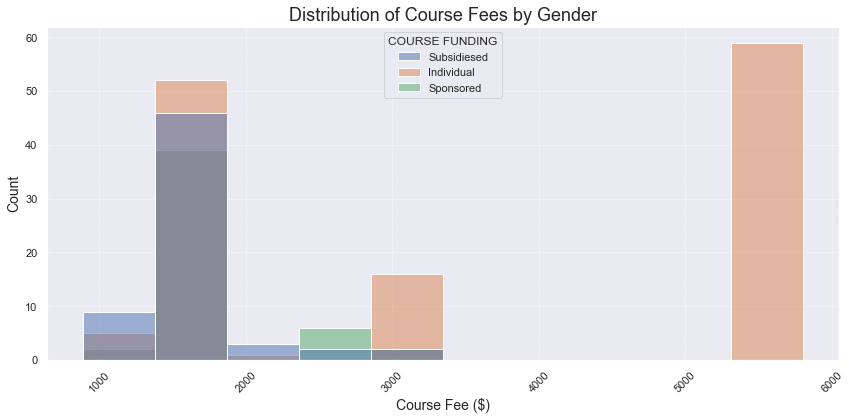

In [619]:
# Set the aesthetic style of the plots
sns.set(style="darkgrid")

# Create the histogram plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='COURSE FEE', hue='COURSE FUNDING')

# Customize the plot
plt.xlabel('Course Fee ($)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Course Fees by Gender', fontsize=18)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   STUDENT ID                             244 non-null    object        
 1   SALUTATION                             244 non-null    object        
 2   GENDER                                 244 non-null    category      
 3   NATIONALITY                            244 non-null    object        
 4   DOB                                    244 non-null    object        
 5   HIGHEST QUALIFICATION                  244 non-null    object        
 6   NAME OF QUALIFICATION AND INSTITUTION  244 non-null    object        
 7   DATE ATTAINED HIGHEST QUALIFICATION    244 non-null    object        
 8   DESIGNATION                            244 non-null    object        
 9   INTAKE NO                              244 non-null    object    

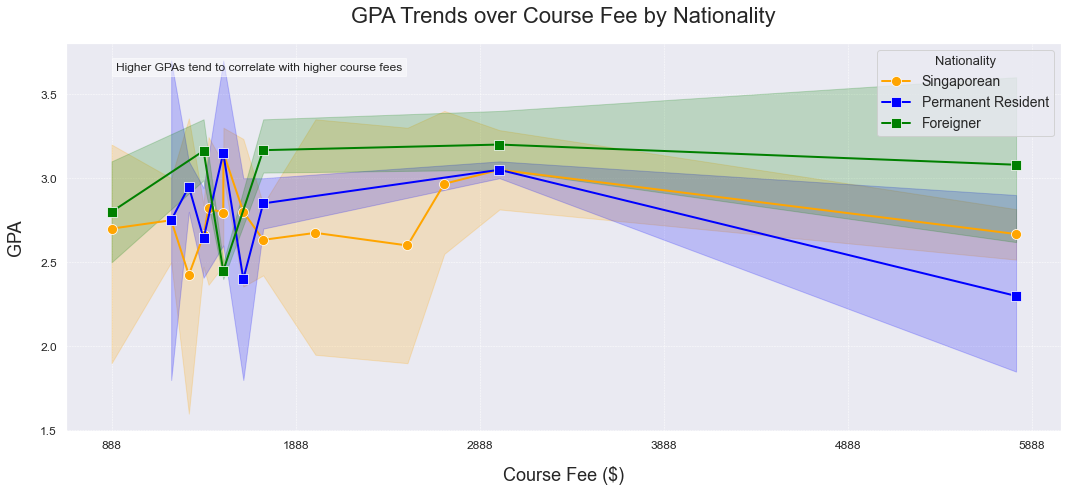

In [621]:
# Ensure 'COMPLETION DATE' is in datetime format
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Separate the data by nationality
df_sg = df[df['NATIONALITY'] == 'Singaporean']
df_PR = df[df['NATIONALITY'] == 'Permanent Resident']
df_F = df[df['NATIONALITY'] == 'Foreigner']

# Determine the range for the course fees
min_fee = df['COURSE FEE'].min()
max_fee = df['COURSE FEE'].max()

# Create a range of values from min to max course fee with a 1000 interval
fee_range = np.arange(min_fee, max_fee + 1000, 1000)

# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Plot 1: Line Plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_sg, x='COURSE FEE', y='GPA', label='Singaporean', color='orange', marker='o', markersize=10, linewidth=2)
sns.lineplot(data=df_PR, x='COURSE FEE', y='GPA', label='Permanent Resident', color='blue', marker='s', markersize=10, linewidth=2)
sns.lineplot(data=df_F, x='COURSE FEE', y='GPA', label='Foreigner', color='green', marker='s', markersize=10, linewidth=2)
plt.xlabel('Course Fee ($)', fontsize=18, labelpad=15)
plt.ylabel('GPA', fontsize=18, labelpad=15)
plt.title('GPA Trends over Course Fee by Nationality', fontsize=22, pad=20)
plt.xticks(ticks=fee_range, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc='upper right', fontsize=14, title='Nationality', title_fontsize='13')
plt.text(0.05, 0.95, 'Higher GPAs tend to correlate with higher course fees', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.tight_layout()
plt.show()



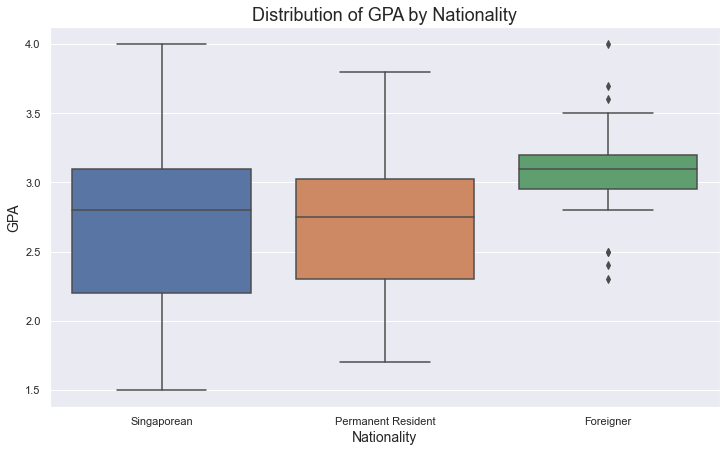

In [622]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='NATIONALITY', y='GPA', data=df)
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.title('Distribution of GPA by Nationality', fontsize=18)
plt.show()


In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   STUDENT ID                             244 non-null    object        
 1   SALUTATION                             244 non-null    object        
 2   GENDER                                 244 non-null    category      
 3   NATIONALITY                            244 non-null    object        
 4   DOB                                    244 non-null    object        
 5   HIGHEST QUALIFICATION                  244 non-null    object        
 6   NAME OF QUALIFICATION AND INSTITUTION  244 non-null    object        
 7   DATE ATTAINED HIGHEST QUALIFICATION    244 non-null    object        
 8   DESIGNATION                            244 non-null    object        
 9   INTAKE NO                              244 non-null    object    

In [624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   STUDENT ID                             244 non-null    object        
 1   SALUTATION                             244 non-null    object        
 2   GENDER                                 244 non-null    category      
 3   NATIONALITY                            244 non-null    object        
 4   DOB                                    244 non-null    object        
 5   HIGHEST QUALIFICATION                  244 non-null    object        
 6   NAME OF QUALIFICATION AND INSTITUTION  244 non-null    object        
 7   DATE ATTAINED HIGHEST QUALIFICATION    244 non-null    object        
 8   DESIGNATION                            244 non-null    object        
 9   INTAKE NO                              244 non-null    object    

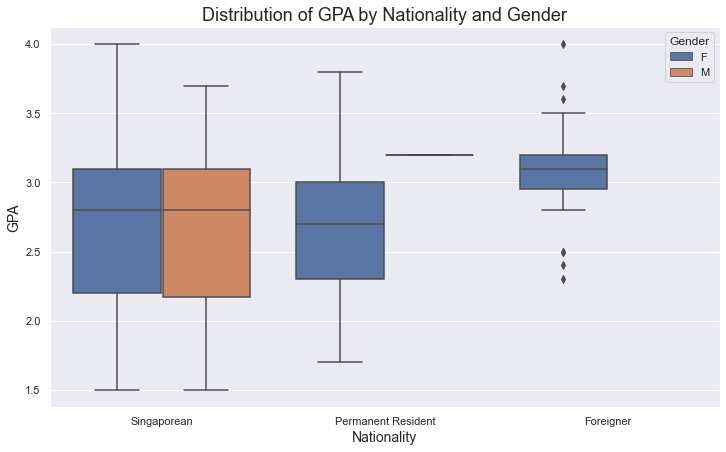

In [625]:
# Ensure 'COMPLETION DATE' is in datetime format
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Plot: Box Plot with hue for gender
plt.figure(figsize=(12, 7))
sns.boxplot(x='NATIONALITY', y='GPA', hue='GENDER', data=df)
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.title('Distribution of GPA by Nationality and Gender', fontsize=18)
plt.legend(title='Gender', loc='upper right')
plt.show()


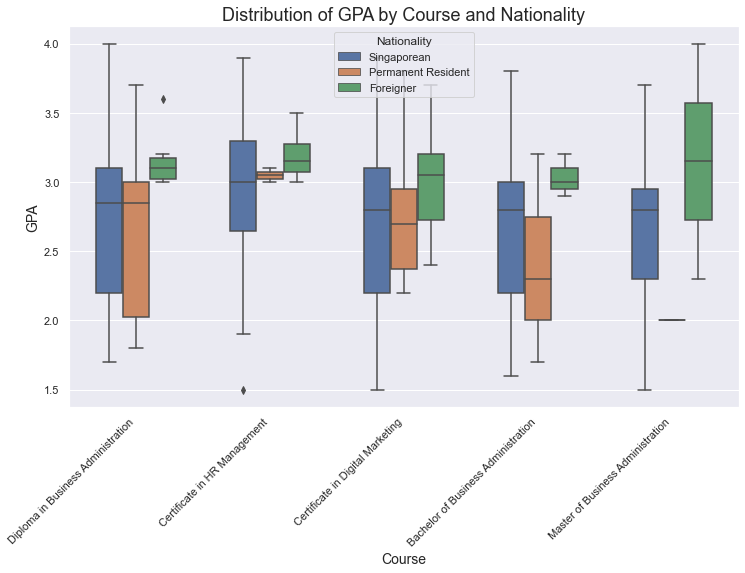

In [626]:
# Ensure 'COMPLETION DATE' is in datetime format
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Mapping dictionary for COURSE values
course_mapping = {
    1101: 'Diploma in Business Administration',
    2101: 'Certificate in HR Management',
    2102: 'Certificate in Digital Marketing',
    5112: 'Bachelor of Business Administration',
    5113: 'Master of Business Administration'
}

# Update COURSE column with mapped names
df['COURSE'] = df['COURSE'].map(course_mapping)

# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Plot: Box Plot with hue for nationality
plt.figure(figsize=(12, 7))
sns.boxplot(x='COURSE', y='GPA', hue='NATIONALITY', data=df, width=0.6)
plt.xlabel('Course', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.title('Distribution of GPA by Course and Nationality', fontsize=18)
plt.legend(title='Nationality', loc='upper center')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


posx and posy should be finite values
posx and posy should be finite values


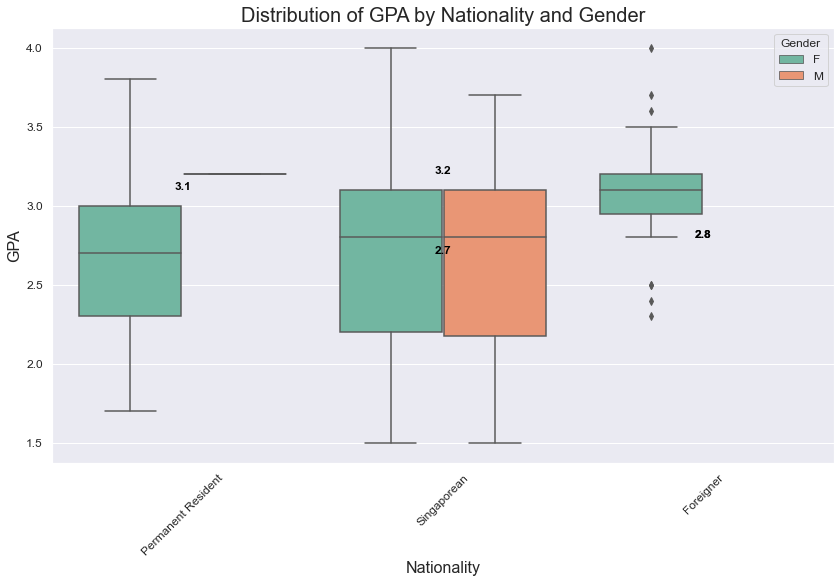

In [627]:
# Ensure 'COMPLETION DATE' is in datetime format
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Order nationalities by mean GPA
ordered_nationalities = df.groupby('NATIONALITY')['GPA'].mean().sort_values().index

# Plot: Box Plot with hue for gender
plt.figure(figsize=(14, 8))
sns.boxplot(x='NATIONALITY', y='GPA', hue='GENDER', data=df, order=ordered_nationalities, palette='Set2')
plt.xlabel('Nationality', fontsize=16)
plt.ylabel('GPA', fontsize=16)
plt.title('Distribution of GPA by Nationality and Gender', fontsize=20)
plt.legend(title='Gender', loc='upper right', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding annotations for median GPA
medians = df.groupby(['NATIONALITY', 'GENDER'])['GPA'].median().reset_index()
for index, row in medians.iterrows():
    plt.text(index // len(df['GENDER'].unique()), row['GPA'], round(row['GPA'], 2), 
             horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()

ValueError: There must be exactly two hue levels to use `split`.'

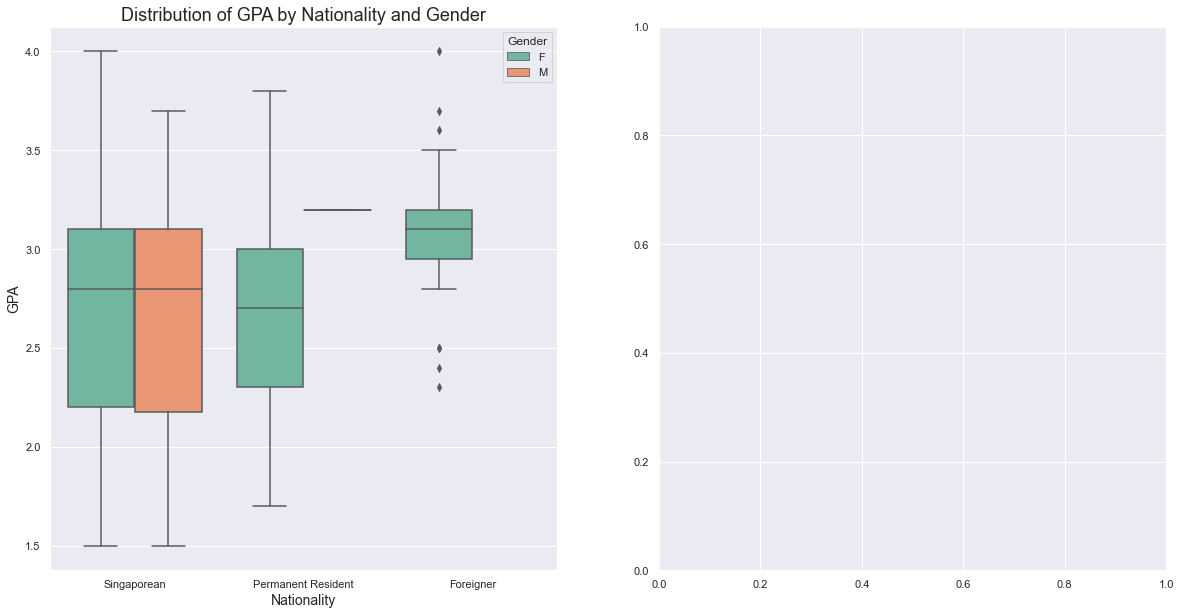

In [628]:
# Ensure 'COMPLETION DATE' is in datetime format
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot: Box Plot with hue for gender and additional category for year of completion
sns.boxplot(x='NATIONALITY', y='GPA', hue='GENDER', data=df, ax=axs[0], palette=custom_palette)
axs[0].set_xlabel('Nationality', fontsize=14)
axs[0].set_ylabel('GPA', fontsize=14)
axs[0].set_title('Distribution of GPA by Nationality and Gender', fontsize=18)
axs[0].legend(title='Gender', loc='upper right')

# Adding another plot: Violin Plot with hue for gender and completion year
sns.violinplot(x='NATIONALITY', y='GPA', hue='COMPLETION DATE', data=df, split=True, ax=axs[1], palette="pastel")
axs[1].set_xlabel('Nationality', fontsize=14)
axs[1].set_ylabel('GPA', fontsize=14)
axs[1].set_title('Distribution of GPA by Nationality and Completion Year', fontsize=18)
axs[1].legend(title='Completion Year', loc='upper right')

# Statistical Annotation
for i, nationality in enumerate(df['NATIONALITY'].unique()):
    males = df[(df['NATIONALITY'] == nationality) & (df['GENDER'] == 'Male')]['GPA']
    females = df[(df['NATIONALITY'] == nationality) & (df['GENDER'] == 'Female')]['GPA']
    t_stat, p_val = stats.ttest_ind(males, females)
    axs[0].text(i, df['GPA'].max() + 0.1, f"p={p_val:.2e}", ha='center', fontsize=12, color='black')

# Show plot
plt.tight_layout()
plt.show()


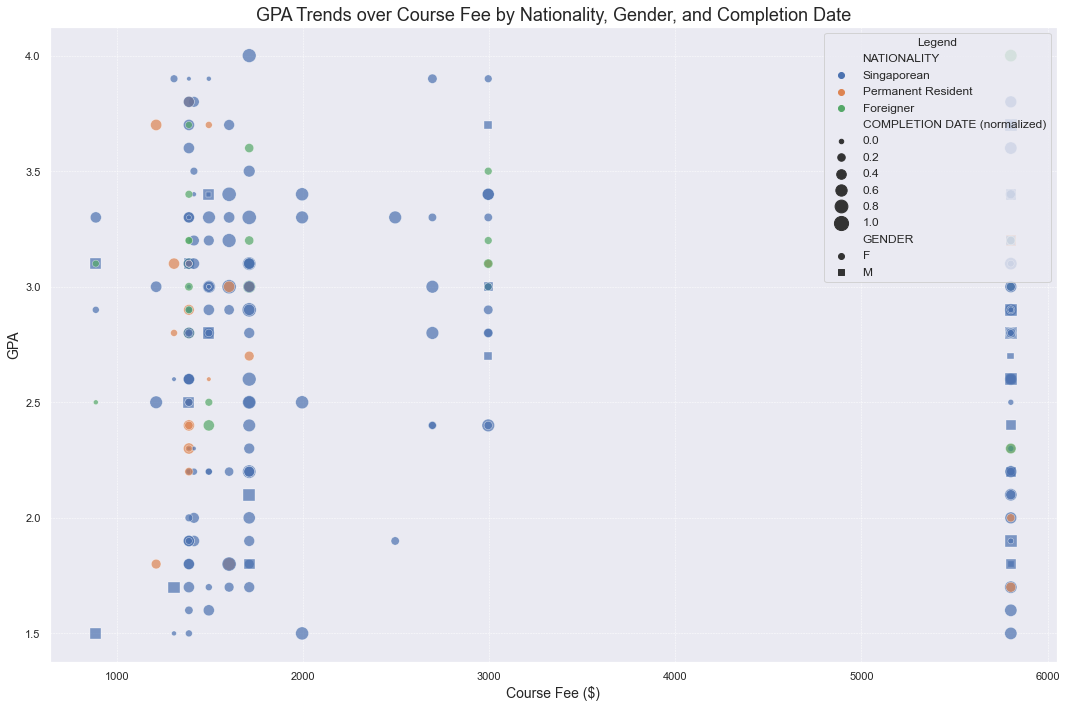

In [ ]:
# Ensure 'COMPLETION DATE' is in datetime format
df['COMPLETION DATE'] = pd.to_datetime(df['COMPLETION DATE'])

# Set the aesthetic style of the plots
sns.set_style("darkgrid")

# Normalize 'COMPLETION DATE' for better visualization in marker size
df['COMPLETION DATE (normalized)'] = (df['COMPLETION DATE'] - df['COMPLETION DATE'].min()) / (df['COMPLETION DATE'].max() - df['COMPLETION DATE'].min())

# Define the marker shapes for genders
markers = {'F': 'o', 'M': 's'}

# Plot: Complex Scatter Plot with multiple dimensions
plt.figure(figsize=(15, 10))

# Scatter plot with different hues for nationality and different markers for gender
sns.scatterplot(
    data=df,
    x='COURSE FEE',
    y='GPA',
    hue='NATIONALITY',
    style='GENDER',
    size='COMPLETION DATE (normalized)',
    sizes=(20, 200),
    markers=markers,
    palette='deep',
    alpha=0.7
)

# Customize the plot
plt.xlabel('Course Fee ($)', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.title('GPA Trends over Course Fee by Nationality, Gender, and Completion Date', fontsize=18)
plt.legend(title='Legend', loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


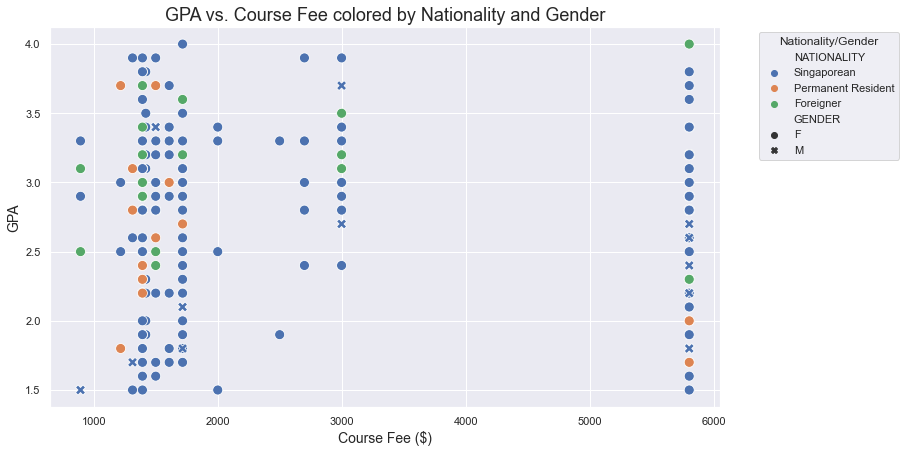

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='COURSE FEE', y='GPA', hue='NATIONALITY', style='GENDER', data=df, s=100)
plt.xlabel('Course Fee ($)', fontsize=14)
plt.ylabel('GPA', fontsize=14)
plt.title('GPA vs. Course Fee colored by Nationality and Gender', fontsize=18)
plt.legend(title='Nationality/Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


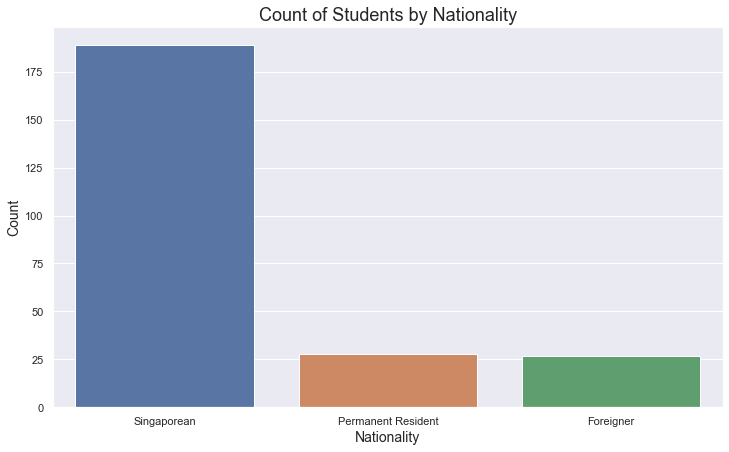

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(x='NATIONALITY', data=df)
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Students by Nationality', fontsize=18)
plt.show()


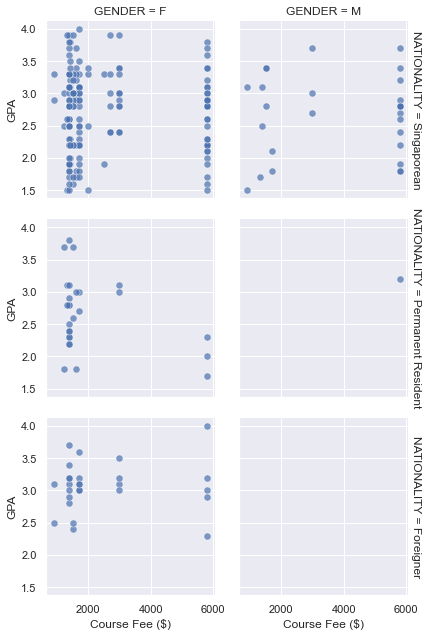

In [ ]:
g = sns.FacetGrid(df, col='GENDER', row='NATIONALITY', margin_titles=True)
g.map(sns.scatterplot, 'COURSE FEE', 'GPA', s=50, alpha=0.7)
g.set_axis_labels('Course Fee ($)', 'GPA')
g.add_legend()
plt.show()
